In [1]:
# Import necessary libraries
import geopandas as gpd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# Load housing dataset
df1 = gpd.read_file('C:/Users/Christ_In_Me/Downloads/housing.csv')
df1.head()

In [2]:
# Load Natural Earth dataset
df = pd.read_csv('C:/Users/Christ_In_Me/Downloads/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Data visualizing to discovery insights

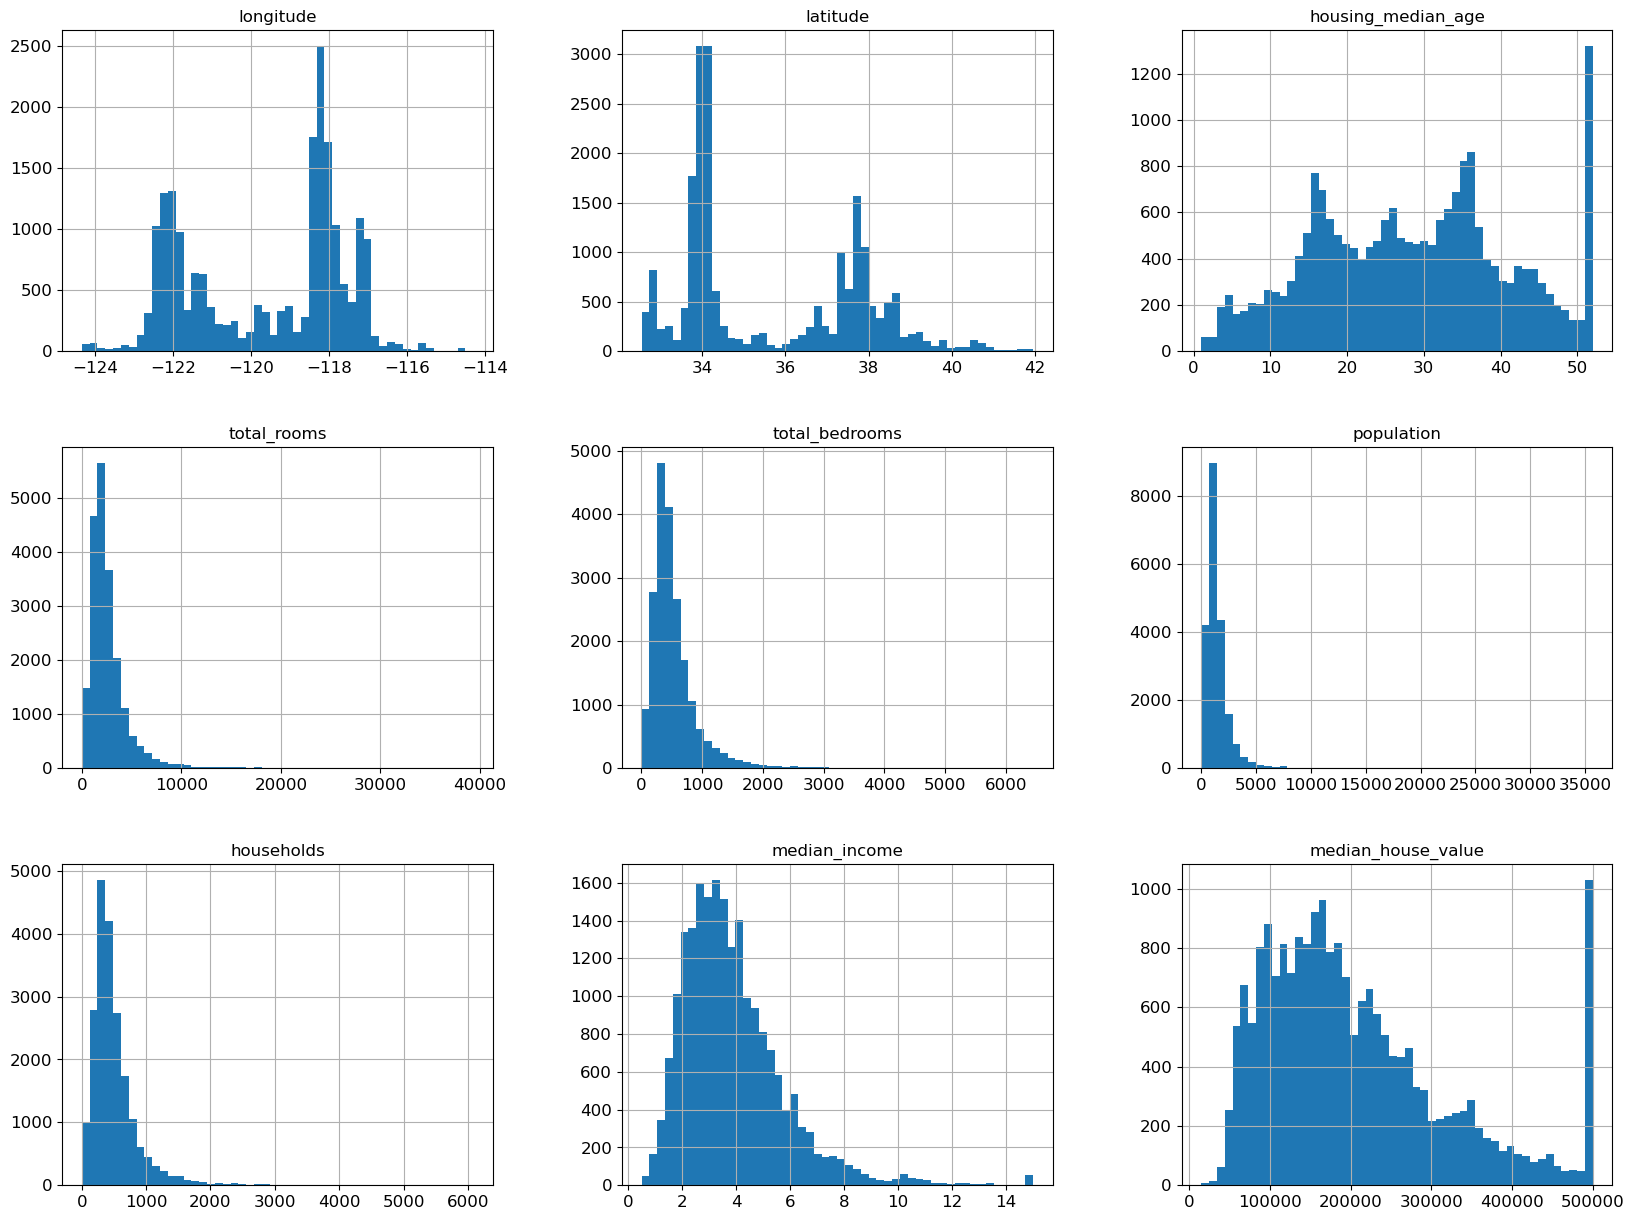

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

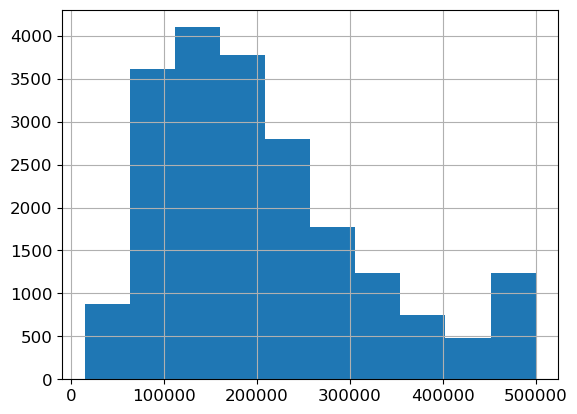

In [5]:
df["median_house_value"].hist()

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

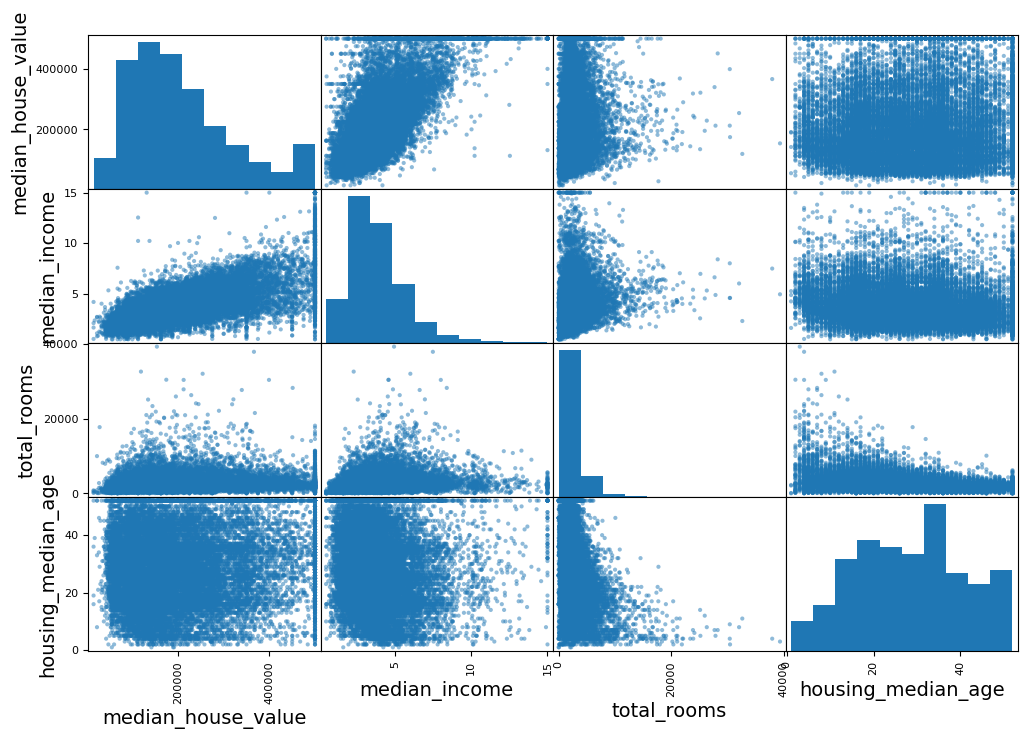

In [6]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

(0.0, 16.0, 0.0, 550000.0)

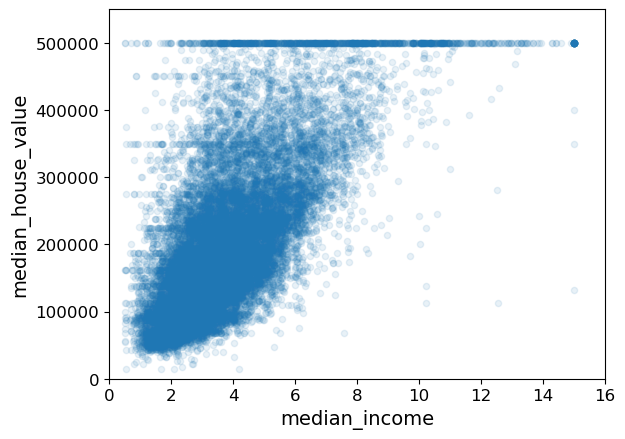

In [7]:
df.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

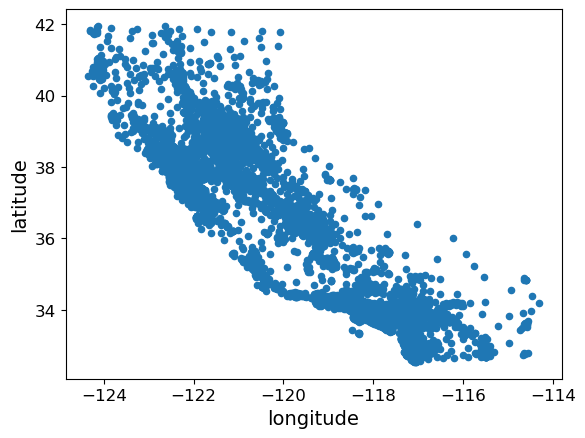

In [8]:
df.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

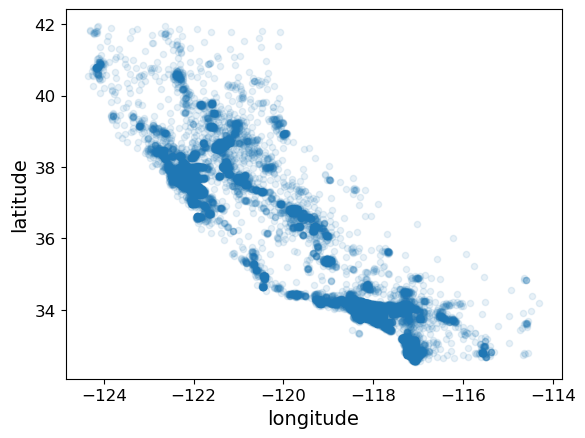

In [9]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

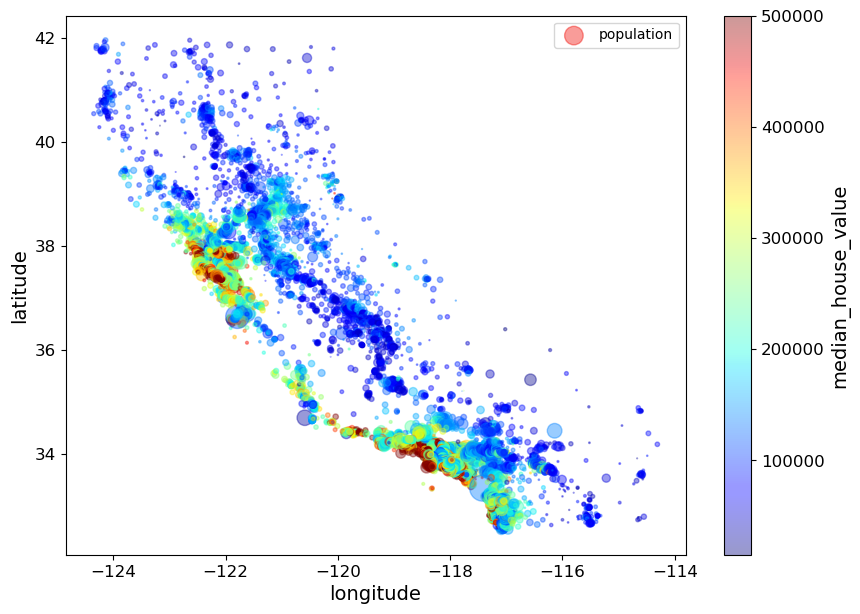

In [10]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
#save_fig("housing_prices_scatterplot")

In [ ]:
#using geopandas to covert Long and Lat to points
df_geo=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.longitude,df.latitude))

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Preprocessing for machine learning

In [12]:
df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
df= df.dropna()

In [15]:
#df1.fillna(df1.mean(), inplace=True)  # If you want to fill missing values with mean

In [16]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
#df1 = df1.drop('ocean_proximity', axis=1)
df = df.drop('ocean_proximity',axis=1)

In [18]:
#housing_num = housing.drop('ocean_proximity', axis=1)
X = df.drop('median_house_value',axis=1)

In [19]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

In [21]:
# Encoding categorical variables
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)


F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [24]:
y = df['median_house_value']

In [25]:
# Feature selection
selector = SelectKBest(score_func=f_classif, k=4)  # Select top k features
X_selected = selector.fit_transform(X_scaled, y)

F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [26]:
#Data splitting
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2)

In [28]:
# Initialize and train the machine learning model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Predict on the test set and evaluate the model
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.046733545387815024


In [32]:
clf=DecisionTreeClassifier()

In [33]:
 clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred = clf.predict(X_val)

In [35]:
accuracy = accuracy_score(y_val, y_pred) 
print("Accuracy:", accuracy) 

Accuracy: 0.046733545387815024


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
# Create an instance of the linear regression model
reg = LinearRegression()

In [38]:
# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

LinearRegression()

In [39]:
# Make predictions on the testing data
y_pred = reg.predict(X_val)

In [40]:
# Evaluate the model performance
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 13676534947.344465


# k-mean clustering for Geospatial data

In [41]:
import pandas as pd

from sklearn.cluster import KMeans
import folium

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
df = pd.read_csv('C:/Users/Christ_In_Me/Downloads/uber_clean.csv')
df.head()

,Date/Time,Lat,Lon,Base,Date
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday


In [43]:
x = df[["Lat", "Lon"]]
x.head()

,Lat,Lon
0,40.7586,-73.9706
1,40.7605,-73.9994
2,40.7320,-73.9999
3,40.7635,-73.9793
4,40.7204,-74.0047


In [44]:
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(x)

F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
df['y'] = y_kmeans

In [46]:
df.head()

,Date/Time,Lat,Lon,Base,Date,y
0,2014-07-01 0:03,40.7586,-73.9706,B02512,Tuesday,2
1,2014-07-01 0:05,40.7605,-73.9994,B02512,Tuesday,2
2,2014-07-01 0:06,40.7320,-73.9999,B02512,Tuesday,0
3,2014-07-01 0:09,40.7635,-73.9793,B02512,Tuesday,2
4,2014-07-01 0:20,40.7204,-74.0047,B02512,Tuesday,0


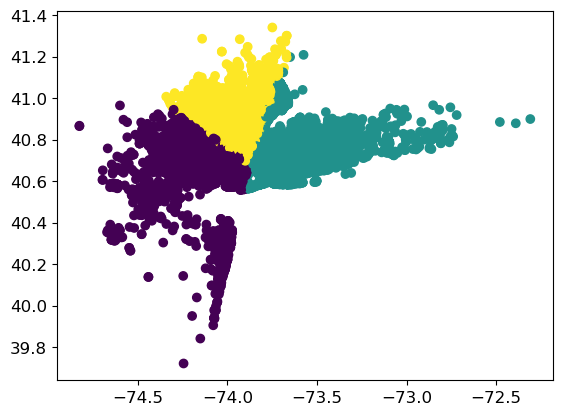

In [47]:
plt.scatter(df['Lon'], df['Lat'], c=df['y'])

In [48]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    y_kmeans = model.fit_predict(x)
    wcss.append(model.inertia_)

F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\anaconda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

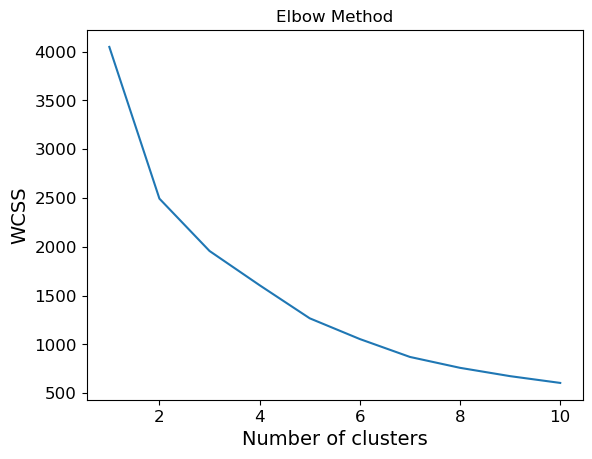

In [49]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [50]:
df = df[:2000]

cluster1 = df[['Lat', "Lon"]][df['y'] == 0].values.tolist()
cluster2 = df[['Lat', "Lon"]][df['y'] == 1].values.tolist()
cluster3 = df[['Lat', "Lon"]][df['y'] == 2].values.tolist()

In [51]:
import folium
map = folium.Map(location=[40.7128, -74.0060], zoom_start=10,tiles = "openstreetmap")
map

In [52]:
for i in cluster1:
    folium.CircleMarker(i, radius=2,color='blue',fill_color='lightblue').add_to(map)
    
for i in cluster2:
    folium.CircleMarker(i, radius=2,color='red',fill_color='lightred').add_to(map)
    
for i in cluster3:
    folium.CircleMarker(i, radius=2,color='green',fill_color='lightgreen').add_to(map)

In [53]:
map